## Импорт библиотек

In [65]:
import hashlib
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка данных

In [29]:
doc_views = pd.read_csv('doc_views.csv')

In [30]:
payments = pd.read_excel('case_data.xlsx', sheet_name = 'Payments')

## Предобработка данных

### Переименование полей

In [31]:
doc_views = doc_views.rename(columns={'ID':'id','Name':'name','Last Name':'last_name','Passport Number':'passport_number'})

In [32]:
doc_views.head(3)

,document_id,user_id,viewed_at,document_title,course_name,university_name,category_id,category_name,premium,rating,pages,word_count,id,name,last_name,passport_number
0,9738742,8469118,2020-11-30 22:59:56,Sosiale medier - 2. time,Sosiale medier,Handelshøyskolen BI,3,Lecture notes,0,0,1,151,1,Jacob,Edwards,1903...
1,2042372,13198098,2020-11-30 22:59:52,Bedriften-kortsvarsspørsmål,Bedriften,Handelshøyskolen BI,7,Summaries,1,50,23,9551,2,Felicia,Smith,1466...
2,3653898,11182794,2020-11-30 22:59:41,Sammendrag-i-markedsføring,Markedsføring-grunnkurs,Norges teknisk-naturvitenskapelige universitet,3,Lecture notes,0,1,107,37572,3,Erin,Parker,4864...


### Обработка пропусков

In [33]:
payments = payments.query('user_id.isna() == False')

In [34]:
doc_views.query('category_name.isna()')

,document_id,user_id,viewed_at,document_title,course_name,university_name,category_id,category_name,premium,rating,pages,word_count,id,name,last_name,passport_number
20,2057305,11601338,2020-11-30 22:57:52,Sammendrag Bedriften HIS3410,Bedriften,Handelshøyskolen BI,7,NaN,1,28,43,11852,21,Catherine,Moore,5913...
21,2695140,13049904,2020-11-30 22:57:50,Eksamen 2017,Personalpsykologi,Universitetet i Bergen,4,NaN,1,11,7,4241,22,Arthur,Smith,2752...
22,2548470,11588852,2020-11-30 22:57:44,Bedriften,Bedriften,Handelshøyskolen BI,3,NaN,1,22,28,4448,23,Ashley,Turner,6746...
23,3622849,13205250,2020-11-30 22:57:36,STV1400 – OPA – Samleark 1,Offentlig politikk og administrasjon 1 (innfør...,Universitetet i Oslo,7,NaN,1,7,47,6089,24,Mark,Warren,1886...
24,6092770,11588852,2020-11-30 22:57:17,Web Page - arbeidskrav 5,Bedriftsøkonomisk analyse,Handelshøyskolen BI,8,NaN,1,5,3,487,25,Edward,Benson,9935...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,4039156,12379916,2020-11-30 22:13:52,Organisasjonsstruktur,Organisasjonsteori og ledelse,Norges Arktiske Universitet,7,NaN,0,7,5,494,341,Lauren,Washington,6327...
341,3910049,12820726,2020-11-30 22:13:36,"Eksamen 12 Desember 2018, svar",Etikk og samfunnsansvar,Universitetet i Sørøst-Norge,4,NaN,0,9,6,4785,342,Melissa,Morgan,1111...
342,9161634,9620122,2020-11-30 22:13:35,"Eksamen 5 Mai 2020, svar",Sosiale medier,Handelshøyskolen BI,4,NaN,1,0,13,4740,343,Tammy,Bennett,7369...
343,2783840,12972078,2020-11-30 22:13:13,"Eksamen 2015, svar",Velferd og økonomisk politikk,Universitetet i Bergen,4,NaN,1,0,2,442,344,Adam,Hood,7535...


In [35]:
category_dict = doc_views.query('category_name.isna() == False')[['category_id','category_name']].drop_duplicates().reset_index(drop=True).set_index('category_id')['category_name'].to_dict()

In [36]:
def fill_nans(col_id):
    return category_dict[col_id]

In [37]:
doc_views['category_name'] = doc_views['category_id'].apply(fill_nans)

In [38]:
doc_views.query('category_name.isna()')

,document_id,user_id,viewed_at,document_title,course_name,university_name,category_id,category_name,premium,rating,pages,word_count,id,name,last_name,passport_number


### Преобразование типов

In [39]:
doc_views['viewed_at'] = pd.to_datetime(doc_views['viewed_at'])

In [40]:
doc_views['passport_number'] = doc_views['passport_number'].astype(str)

In [41]:
doc_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   document_id      2241 non-null   int64         
 1   user_id          2241 non-null   int64         
 2   viewed_at        2241 non-null   datetime64[ns]
 3   document_title   2241 non-null   object        
 4   course_name      2241 non-null   object        
 5   university_name  2241 non-null   object        
 6   category_id      2241 non-null   int64         
 7   category_name    2241 non-null   object        
 8   premium          2241 non-null   int64         
 9   rating           2241 non-null   int64         
 10  pages            2241 non-null   int64         
 11  word_count       2241 non-null   int64         
 12  id               2241 non-null   int64         
 13  name             2241 non-null   object        
 14  last_name        2241 non-null   object 

In [42]:
payments['user_id'] = payments['user_id'].astype(int)

In [43]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 36 to 3417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3382 non-null   int64         
 1   created_at      3382 non-null   datetime64[ns]
 2   user_id         3382 non-null   int64         
 3   amount          3382 non-null   int64         
 4   brand_code      3382 non-null   object        
 5   shopper_locale  3382 non-null   object        
 6   currency        3382 non-null   object        
 7   event_code      3382 non-null   object        
 8   is_trial        3382 non-null   int64         
 9   trial_days      3382 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 290.6+ KB


### Анонимизация данных

In [44]:
def hash_passport(passport):
    return hashlib.sha256(passport.encode()).hexdigest()

In [45]:
doc_views['passport_number'] = doc_views['passport_number'].apply(hash_passport)

In [46]:
doc_views = doc_views.drop(columns='last_name')

In [47]:
doc_views.head()

,document_id,user_id,viewed_at,document_title,course_name,university_name,category_id,category_name,premium,rating,pages,word_count,id,name,passport_number
0,9738742,8469118,2020-11-30 22:59:56,Sosiale medier - 2. time,Sosiale medier,Handelshøyskolen BI,3,Lecture notes,0,0,1,151,1,Jacob,7d41dbb1caed125dc35cf0018f298844c8d1c74ffb00e2...
1,2042372,13198098,2020-11-30 22:59:52,Bedriften-kortsvarsspørsmål,Bedriften,Handelshøyskolen BI,7,Summaries,1,50,23,9551,2,Felicia,3032fb8eb98de582cd11a0eeb1f94c327aea2413dfcdd5...
2,3653898,11182794,2020-11-30 22:59:41,Sammendrag-i-markedsføring,Markedsføring-grunnkurs,Norges teknisk-naturvitenskapelige universitet,3,Lecture notes,0,1,107,37572,3,Erin,5c1079836d9b7ddaeabcc67d031a5a7b2bb5c22173977c...
3,7968789,13004670,2020-11-30 22:59:37,"Dydsetikk og abort, Hursthouse",Examen philosophicum,Universitetet i Oslo,8,Mandatory assignments,1,3,6,929,4,Morgan,46d77f6d89836f8864188ebd124882789c214933820ece...
4,2036442,12525936,2020-11-30 22:59:30,Kortsvar-bedriften - Sammendrag Bedriften,Bedriften,Handelshøyskolen BI,7,Summaries,1,228,21,5567,5,Lisa,6a5f121ac346a55ce0f888a297effc6cfa48aeceddcd33...


### Обработка дублей

In [48]:
doc_views.duplicated().sum()

np.int64(0)

In [51]:
payments.duplicated().sum()

np.int64(0)

In [50]:
payments = payments.drop_duplicates()

## Выгрузка данных в GPT и генерация гипотез

In [54]:
doc_views.to_csv('doc_views_resalt.csv', index=False)

In [55]:
payments.to_csv('payments_resalt.csv', index=False)

## Исследовательский анализ данных

### Локализация покупетелей

In [57]:
payments.head()

,id,created_at,user_id,amount,brand_code,shopper_locale,currency,event_code,is_trial,trial_days
36,2663248,2020-11-30 21:06:53,13204266,0,visa,no,NOK,AUTHORISATION,1,30
37,2663241,2020-11-30 21:04:38,9007774,11997,visa,no,NOK,AUTHORISATION,0,0
38,2663236,2020-11-30 21:03:04,13204246,0,mc,no,NOK,AUTHORISATION,1,30
39,2663168,2020-11-30 20:59:30,13131658,0,visa,no,NOK,AUTHORISATION,1,30
40,2663144,2020-11-30 20:51:15,13203938,0,visa,no,NOK,AUTHORISATION,1,30


In [58]:
payments.shopper_locale.unique()

array(['no', 'en_us', 'en_gb', 'nl', 'en_ie', 'en_au', 'en', 'row', 'sv',
       'in', 'it', 'de_ch', 'da', 'en_nz', 'hk', 'en_ca', 'de', 'es',
       'vn', 'sg', 'ja'], dtype=object)

In [68]:
locale_amounts = payments.groupby('shopper_locale')['amount'].sum()

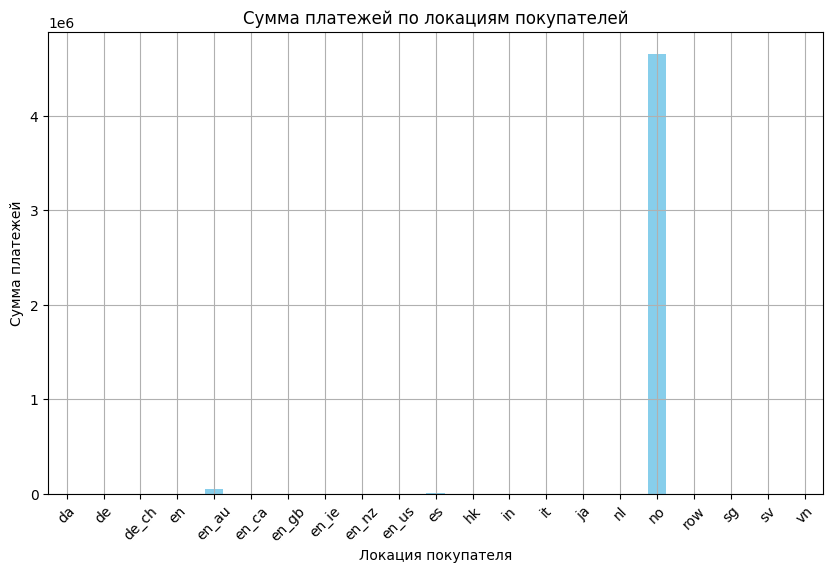

In [70]:
plt.figure(figsize=(10, 6)) # Задаем размер графика
locale_amounts.plot(kind='bar', color='skyblue') # Создаем столбчатую диаграмму
plt.title('Сумма платежей по локациям покупателей') # Заголовок диаграммы
plt.xlabel('Локация покупателя') # Подпись оси Х
plt.ylabel('Сумма платежей') # Подпись оси Y
plt.xticks(rotation=45) # Поворот подписей на оси X для лучшей читаемости
plt.grid(True) # Включаем сетку для удобства восприятия
plt.show()

### Влияние пробных периодов на последующие платежи

In [76]:
trial_users = payments.query('is_trial == 1').drop_duplicates()[['user_id','is_trial']].reset_index(drop = True)

In [78]:
payed_users = payments.query('amount > 1').drop_duplicates()[['user_id','amount']].reset_index(drop = True)

In [79]:
joined_t = payed_users.merge(trial_users,how='left')

In [80]:
joined_t.head()

,user_id,amount,is_trial
0,9007774,11997,NaN
1,5780180,11997,NaN
2,7763096,11997,NaN
3,13199820,11997,1.0
4,8285304,11997,NaN


In [82]:
joined_t['is_trial'].sum()

np.float64(19.0)

In [84]:
joined_t['amount'].count()

np.int64(257)

In [85]:
print('Доля тех, кто имел пробный период из тех, кто оплатил', round(joined_t['is_trial'].sum()/joined_t['amount'].count()*100,1),'%')

Доля тех, кто имел пробный период из тех, кто оплатил 7.4 %
